<a href="https://colab.research.google.com/github/cesong2/Display-Sensor/blob/CGKim/Predictive_Maintenance_%EB%B6%84%EC%84%9D_%ED%86%B5%ED%95%A9_sjs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파일 불러오기 및 전처리

In [1]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-san

In [2]:
# import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 한글 폰트 불러오기
plt.rc('font', family='NanumBarunGothic')

In [4]:
# 파일 불러오기
df = pd.read_csv('/content/ai4i2020.csv')

In [5]:
# 데이터 확인
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [6]:
# UDI를 인덱스로
df.set_index('UDI',inplace=True)
# 확인
df

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
UDI,,,,,,,,,,,,,
1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0


In [7]:
# 컬럼명 단위 삭제
df.rename(columns={'Air temperature [K]':'Air temperature',
                   'Process temperature [K]':'Process temperature',
                   'Rotational speed [rpm]':'Rotational speed',
                   'Torque [Nm]':'Torque',
                   'Tool wear [min]':'Tool wear'},inplace=True)
# 확인
df

,Product ID,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
UDI,,,,,,,,,,,,,
1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0


In [8]:
# 켈빈(K) 온도에서 섭씨(C) 온도로
df['Air temperature'] = df['Air temperature'] - 273.15
df['Process temperature'] = df['Process temperature'] - 273.15
# 확인
df

,Product ID,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
UDI,,,,,,,,,,,,,
1,M14860,M,24.95,35.45,1551,42.8,0,0,0,0,0,0,0
2,L47181,L,25.05,35.55,1408,46.3,3,0,0,0,0,0,0
3,L47182,L,24.95,35.35,1498,49.4,5,0,0,0,0,0,0
4,L47183,L,25.05,35.45,1433,39.5,7,0,0,0,0,0,0
5,L47184,L,25.05,35.55,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,M24855,M,25.65,35.25,1604,29.5,14,0,0,0,0,0,0
9997,H39410,H,25.75,35.25,1632,31.8,17,0,0,0,0,0,0
9998,M24857,M,25.85,35.45,1645,33.4,22,0,0,0,0,0,0


In [9]:
# 한글화
df.rename(columns={'UDI':'고유 식별자',
                   'Product ID':'제품 ID',
                   'Type':'제품 유형',
                   'Air temperature':'기온',
                   'Process temperature':'공정 온도',
                   'Rotational speed':'회전 속도',
                   'Torque':'회전력',
                   'Tool wear':'공구 마모 시간',
                   'Machine failure':'고장 여부',
                   'TWF':'고장 원인 : 공구 마모',
                   'HDF':'고장 원인 : 열 방산',
                   'PWF':'고장 원인 : 동력 이상',
                   'OSF':'고장 원인 : 과부하',
                   'RNF':'고장 원인 : 무작위'},inplace=True)
# 확인
df

,제품 ID,제품 유형,기온,공정 온도,회전 속도,회전력,공구 마모 시간,고장 여부,고장 원인 : 공구 마모,고장 원인 : 열 방산,고장 원인 : 동력 이상,고장 원인 : 과부하,고장 원인 : 무작위
UDI,,,,,,,,,,,,,
1,M14860,M,24.95,35.45,1551,42.8,0,0,0,0,0,0,0
2,L47181,L,25.05,35.55,1408,46.3,3,0,0,0,0,0,0
3,L47182,L,24.95,35.35,1498,49.4,5,0,0,0,0,0,0
4,L47183,L,25.05,35.45,1433,39.5,7,0,0,0,0,0,0
5,L47184,L,25.05,35.55,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,M24855,M,25.65,35.25,1604,29.5,14,0,0,0,0,0,0
9997,H39410,H,25.75,35.25,1632,31.8,17,0,0,0,0,0,0
9998,M24857,M,25.85,35.45,1645,33.4,22,0,0,0,0,0,0


# 기초 분석

In [10]:
# 데이터 정보 확인 / null값 존재 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   제품 ID          10000 non-null  object 
 1   제품 유형          10000 non-null  object 
 2   기온             10000 non-null  float64
 3   공정 온도          10000 non-null  float64
 4   회전 속도          10000 non-null  int64  
 5   회전력            10000 non-null  float64
 6   공구 마모 시간       10000 non-null  int64  
 7   고장 여부          10000 non-null  int64  
 8   고장 원인 : 공구 마모  10000 non-null  int64  
 9   고장 원인 : 열 방산   10000 non-null  int64  
 10  고장 원인 : 동력 이상  10000 non-null  int64  
 11  고장 원인 : 과부하    10000 non-null  int64  
 12  고장 원인 : 무작위    10000 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 1.1+ MB


In [11]:
# 대이터 개관 확인
df.describe()

,기온,공정 온도,회전 속도,회전력,공구 마모 시간,고장 여부,고장 원인 : 공구 마모,고장 원인 : 열 방산,고장 원인 : 동력 이상,고장 원인 : 과부하,고장 원인 : 무작위
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,26.854930,36.855560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,22.150000,32.550000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,25.150000,35.650000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,26.950000,36.950000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,28.350000,37.950000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,31.350000,40.650000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


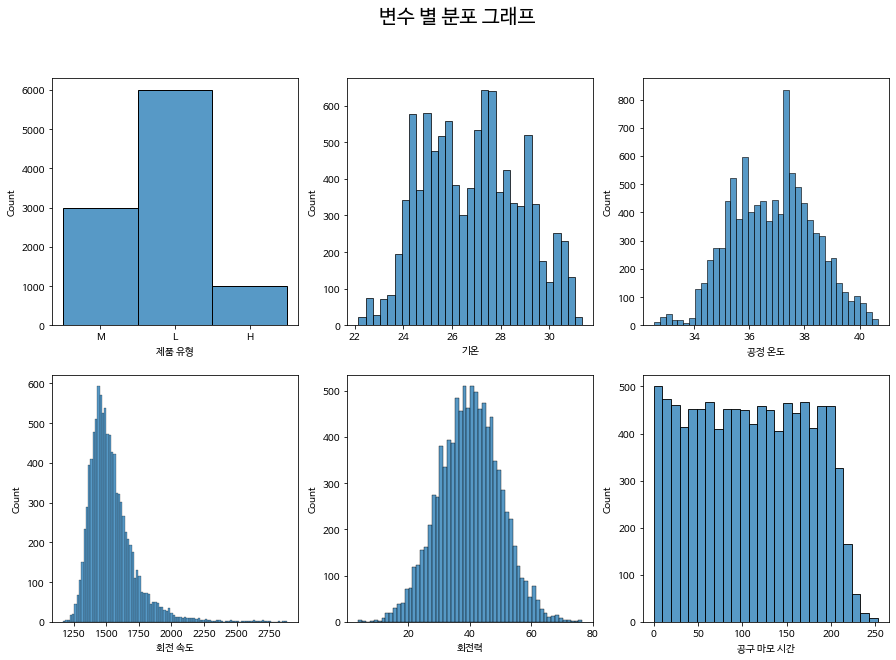

In [12]:
# 변인 분포 시각화
fig = plt.figure(figsize=(15,10))

fig.suptitle('변수 별 분포 그래프', size=20)

ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)
ax6=fig.add_subplot(2,3,6)

sns.histplot(df['제품 유형'],ax=ax1)
sns.histplot(df['기온'],ax=ax2)
sns.histplot(df['공정 온도'],ax=ax3)
sns.histplot(df['회전 속도'],ax=ax4)
sns.histplot(df['회전력'],ax=ax5)
sns.histplot(df['공구 마모 시간'],ax=ax6)

plt.show()

In [13]:
# 고장 원인 갯수 세기
df.sum()

제품 ID            M14860L47181L47182L47183L47184M14865L47186L471...
제품 유형            MLLLLMLLMMHHMMLLMMHMHLMLMLLHLLMLLLMMMLHLLLMHML...
기온                                                        268549.3
공정 온도                                                     368555.6
회전 속도                                                     15387761
회전력                                                       399869.1
공구 마모 시간                                                   1079510
고장 여부                                                          339
고장 원인 : 공구 마모                                                   46
고장 원인 : 열 방산                                                   115
고장 원인 : 동력 이상                                                   95
고장 원인 : 과부하                                                     98
고장 원인 : 무작위                                                     19
dtype: object

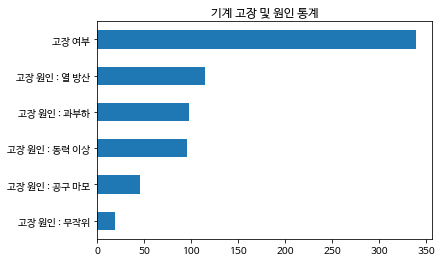

In [14]:
# 고장 원인 갯수 시각화
df[['고장 여부', '고장 원인 : 공구 마모', '고장 원인 : 열 방산', '고장 원인 : 동력 이상', '고장 원인 : 과부하', '고장 원인 : 무작위']].sum().sort_values().plot(kind='barh', title='기계 고장 및 원인 통계')

In [15]:
#고장 요인 합계 컬럼 생성
df['고장 요인 합계'] = df['고장 원인 : 열 방산'] + df['고장 원인 : 과부하'] + df['고장 원인 : 동력 이상'] + df['고장 원인 : 공구 마모'] + df['고장 원인 : 무작위']

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


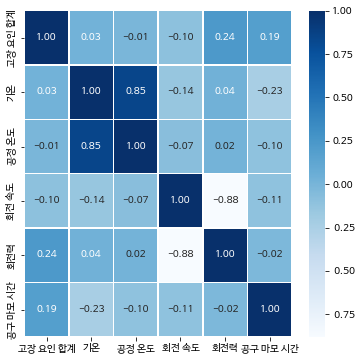

In [16]:
# 상관계수 추출

# 기계 고장 발생 데이터 생성
df_failure =df.groupby('고장 여부')

# 기계 고장 그룹 생성
df_fail_1=df_failure.get_group(1)

data_failure_Total = df_fail_1[['고장 요인 합계','기온' , '공정 온도', '회전 속도','회전력', '공구 마모 시간']]

# failure Total 상관 관계 heatmap 
plt.figure(figsize=(6,6))
sns.heatmap(data = data_failure_Total.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

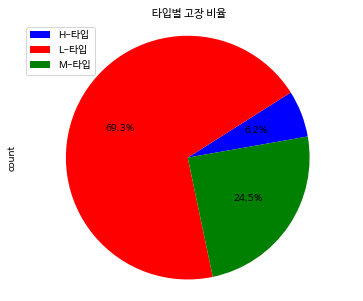

In [17]:
# failue = 1 의 failure Total type 별 비중
df_fail_1_count = df_fail_1.groupby('제품 유형').count()
df_fail_1_count['count'] =  df_fail_1_count['회전력']
df_fail_1_count.index= ['H-타입','L-타입','M-타입']
df_fail_1_count['count'].plot(kind='pie', figsize=(6,5), autopct='%1.1f%%', startangle=10, colors=['blue', 'red' ,'green'], labels=None) 
plt.title('타입별 고장 비율', size=11)
plt.axis('equal')
plt.legend(labels=df_fail_1_count.index, loc = 'upper left')
plt.show()

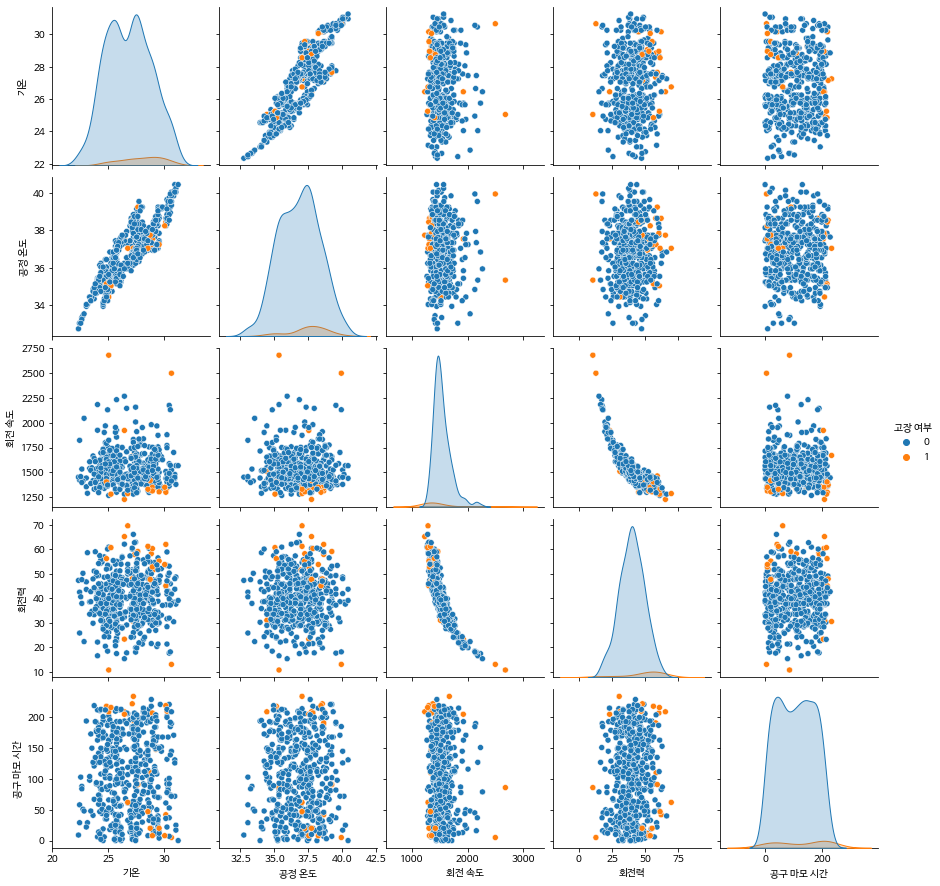

In [18]:
# 페어플롯
sns.pairplot(df[['기온', '공정 온도', '회전 속도', '회전력', '공구 마모 시간', '고장 여부']].sample(frac=0.05), hue='고장 여부')

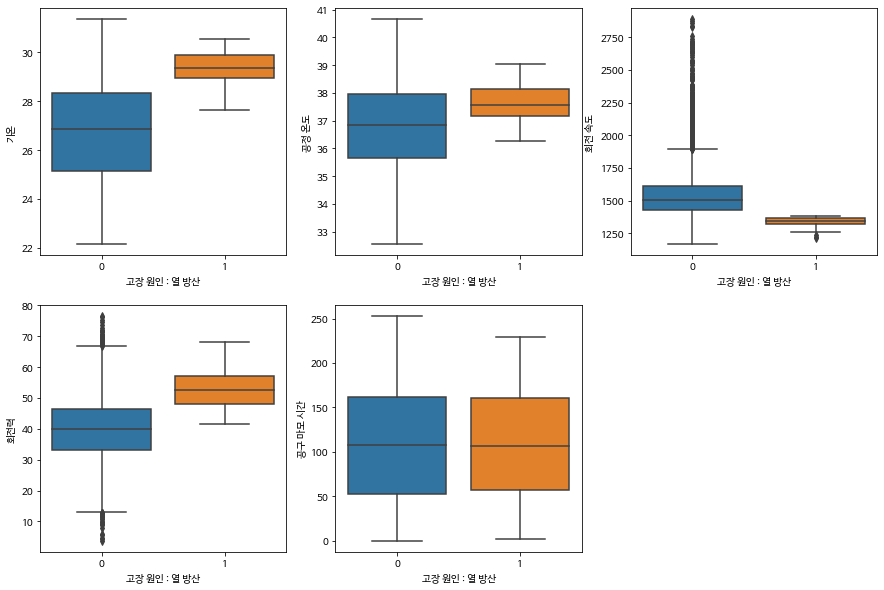

In [19]:
# 각 변수들과 '고장 원인 : 열 방산'과의 상관관계 비교
fig = plt.figure(figsize=(15,10))

ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)

sns.boxplot(x='고장 원인 : 열 방산', y='기온', data=df, ax=ax1)
sns.boxplot(x='고장 원인 : 열 방산', y='공정 온도', data=df, ax=ax2)
sns.boxplot(x='고장 원인 : 열 방산', y='회전 속도', data=df, ax=ax3)
sns.boxplot(x='고장 원인 : 열 방산', y='회전력', data=df, ax=ax4)
sns.boxplot(x='고장 원인 : 열 방산', y='공구 마모 시간', data=df, ax=ax5)

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


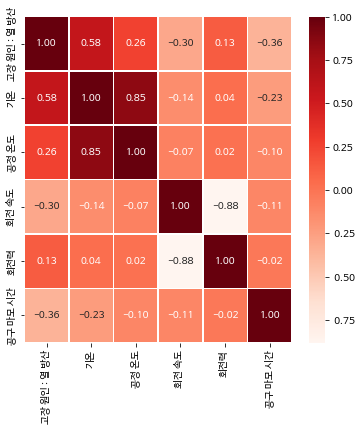

In [20]:
data_HDF = df_fail_1[['고장 원인 : 열 방산','기온' , '공정 온도', '회전 속도','회전력', '공구 마모 시간']]
plt.figure(figsize=(6,6))
sns.heatmap(data = data_HDF.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Reds')

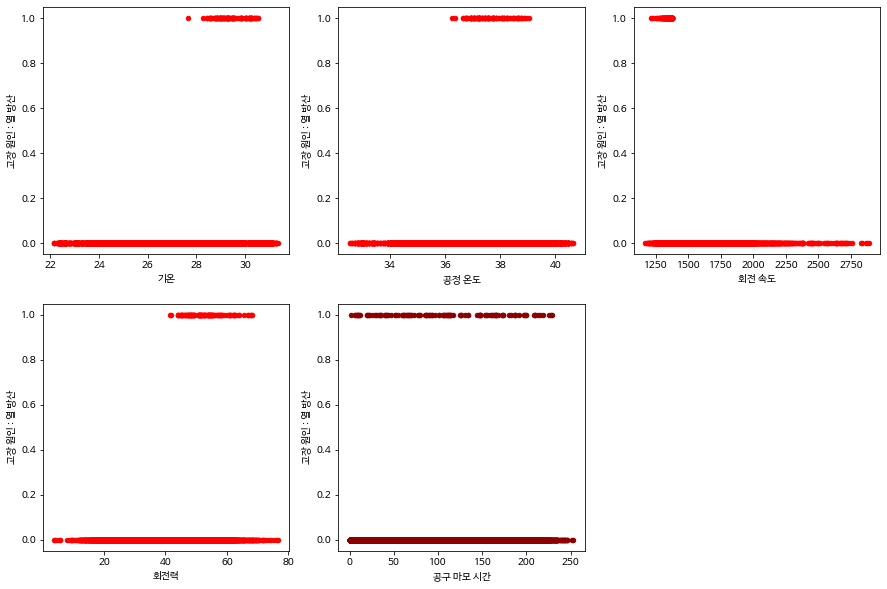

In [21]:
fig = plt.figure(figsize=(15,10))

ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)

df.plot(x='기온', y='고장 원인 : 열 방산', kind='scatter', ax=ax1, c='red')
df.plot(x='공정 온도', y='고장 원인 : 열 방산', kind='scatter', ax=ax2, c='red')
df.plot(x='회전 속도', y='고장 원인 : 열 방산', kind='scatter', ax=ax3, c='red')
df.plot(x='회전력', y='고장 원인 : 열 방산', kind='scatter', ax=ax4, c='red')
df.plot(x='공구 마모 시간', y='고장 원인 : 열 방산', kind='scatter', ax=ax5, c='darkred')

In [22]:
print(df[df['고장 원인 : 열 방산'] == 1]['기온'].min())
print(df[df['고장 원인 : 열 방산'] == 1]['공정 온도'].min())
print(df[df['고장 원인 : 열 방산'] == 1]['회전 속도'].max())
print(df[df['고장 원인 : 열 방산'] == 1]['회전력'].min())

27.650000000000034
36.25
1379
41.6


In [23]:
# 해석
# 고장 원인 : 열 방산의 경우
# 기온과의 상관계수가 가장 높으며,
# 기온이 27.65도 이상, 공정온도 36.25도 이상, 회전속도 1379 rpm 이하, 회전력 41.6Nm 이상의 조건에서 기계 고장이 일어나는 것으로 보인다.

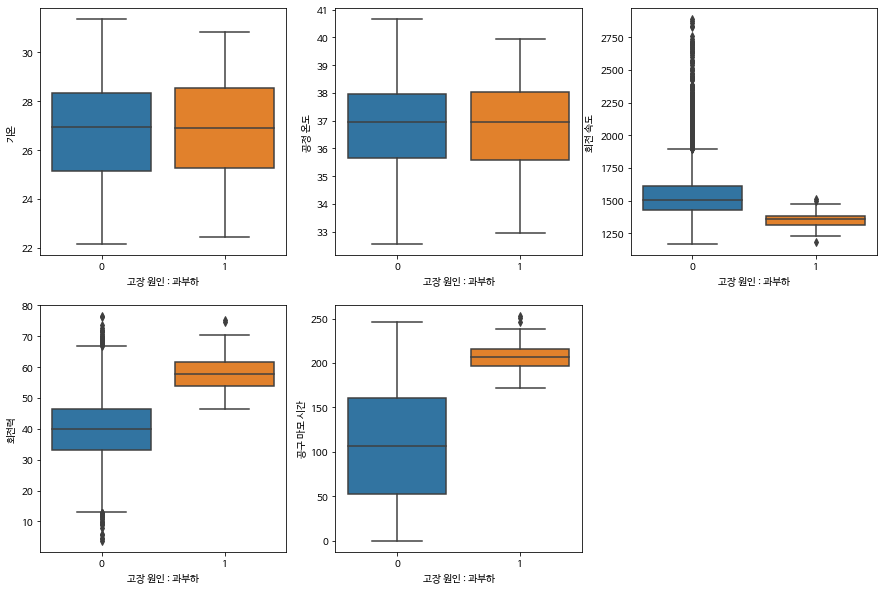

In [24]:
# 각 변수들과 '고장 원인 : 과부하'와의 상관관계 비교
fig = plt.figure(figsize=(15,10))

ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)

sns.boxplot(x='고장 원인 : 과부하', y='기온', data=df, ax=ax1)
sns.boxplot(x='고장 원인 : 과부하', y='공정 온도', data=df, ax=ax2)
sns.boxplot(x='고장 원인 : 과부하', y='회전 속도', data=df, ax=ax3)
sns.boxplot(x='고장 원인 : 과부하', y='회전력', data=df, ax=ax4)
sns.boxplot(x='고장 원인 : 과부하', y='공구 마모 시간', data=df, ax=ax5)

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


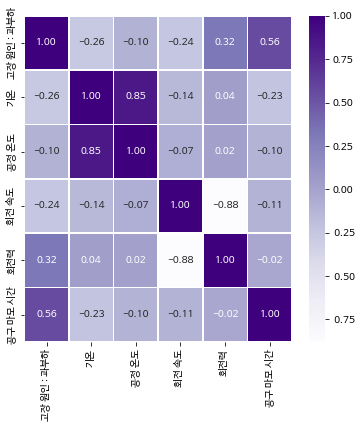

In [25]:
data_OSF = df_fail_1[['고장 원인 : 과부하','기온' , '공정 온도', '회전 속도','회전력', '공구 마모 시간']]
plt.figure(figsize=(6,6))
sns.heatmap(data = data_OSF.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Purples')

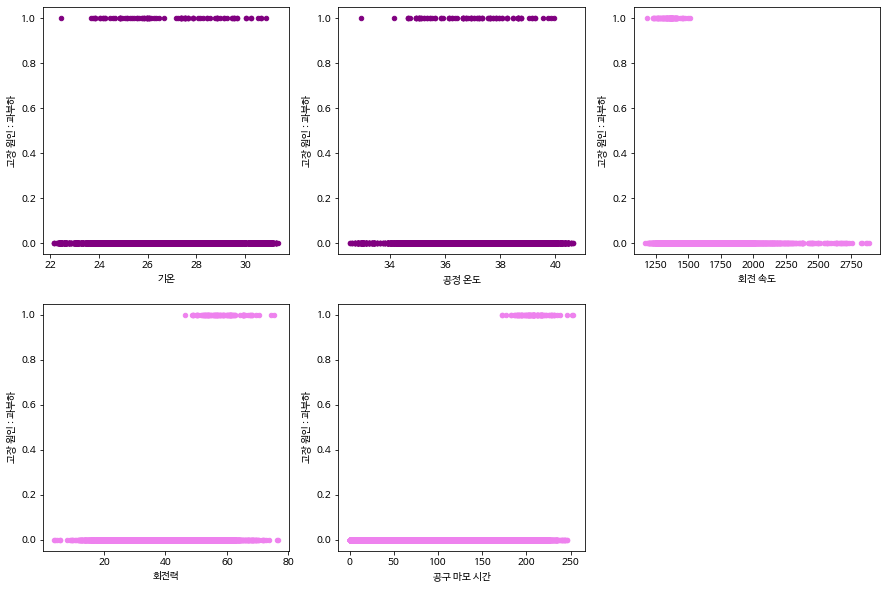

In [26]:
fig = plt.figure(figsize=(15,10))

ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)

df.plot(x='기온', y='고장 원인 : 과부하', kind='scatter', ax=ax1, c='purple')
df.plot(x='공정 온도', y='고장 원인 : 과부하', kind='scatter', ax=ax2, c='purple')
df.plot(x='회전 속도', y='고장 원인 : 과부하', kind='scatter', ax=ax3, c='violet')
df.plot(x='회전력', y='고장 원인 : 과부하', kind='scatter', ax=ax4, c='violet')
df.plot(x='공구 마모 시간', y='고장 원인 : 과부하', kind='scatter', ax=ax5, c='violet')

In [27]:
print(df[df['고장 원인 : 과부하'] == 1]['회전 속도'].max())
print(df[df['고장 원인 : 과부하'] == 1]['회전력'].min())
print(df[df['고장 원인 : 과부하'] == 1]['공구 마모 시간'].min())

1515
46.3
172


In [28]:
# 해석
# 고장 원인 : 과부하의 경우
# 공구 마모 시간과의 상관계수가 가장 높으며,
# 회전속도 1515 rpm 이하, 회전력 46.3Nm 이상, 공구 마모 시간 172min 이상의 조건에서 기계 고장이 일어나는 것으로 보인다.

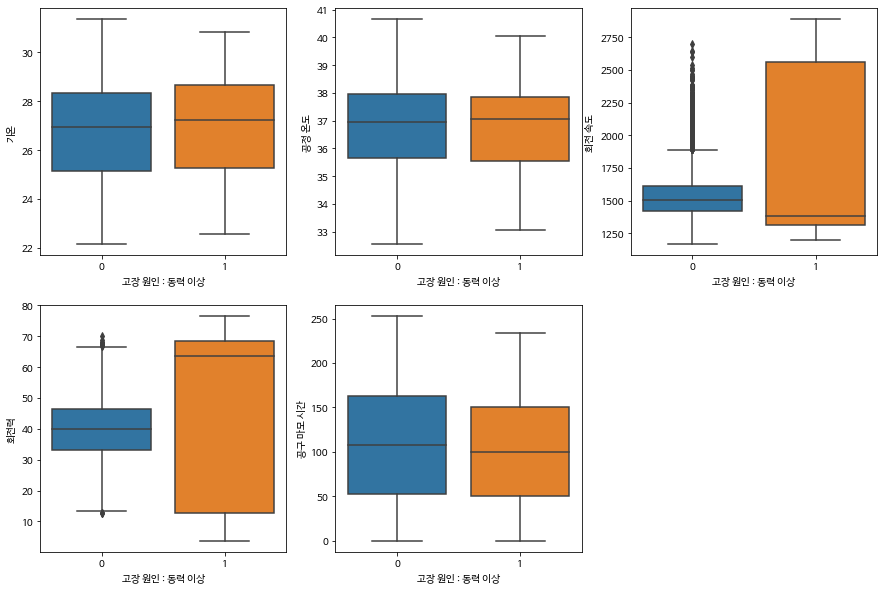

In [29]:
# 각 변수들과 '고장 원인 : 동력 이상'과의 상관관계 비교
fig = plt.figure(figsize=(15,10))

ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)

sns.boxplot(x='고장 원인 : 동력 이상', y='기온', data=df, ax=ax1)
sns.boxplot(x='고장 원인 : 동력 이상', y='공정 온도', data=df, ax=ax2)
sns.boxplot(x='고장 원인 : 동력 이상', y='회전 속도', data=df, ax=ax3)
sns.boxplot(x='고장 원인 : 동력 이상', y='회전력', data=df, ax=ax4)
sns.boxplot(x='고장 원인 : 동력 이상', y='공구 마모 시간', data=df, ax=ax5)

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


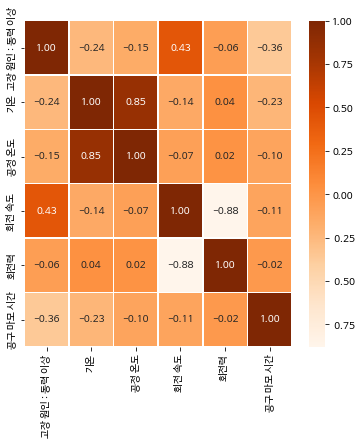

In [30]:
data_PWF = df_fail_1[['고장 원인 : 동력 이상','기온' , '공정 온도', '회전 속도','회전력', '공구 마모 시간']]
plt.figure(figsize=(6,6))
sns.heatmap(data = data_PWF.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Oranges')

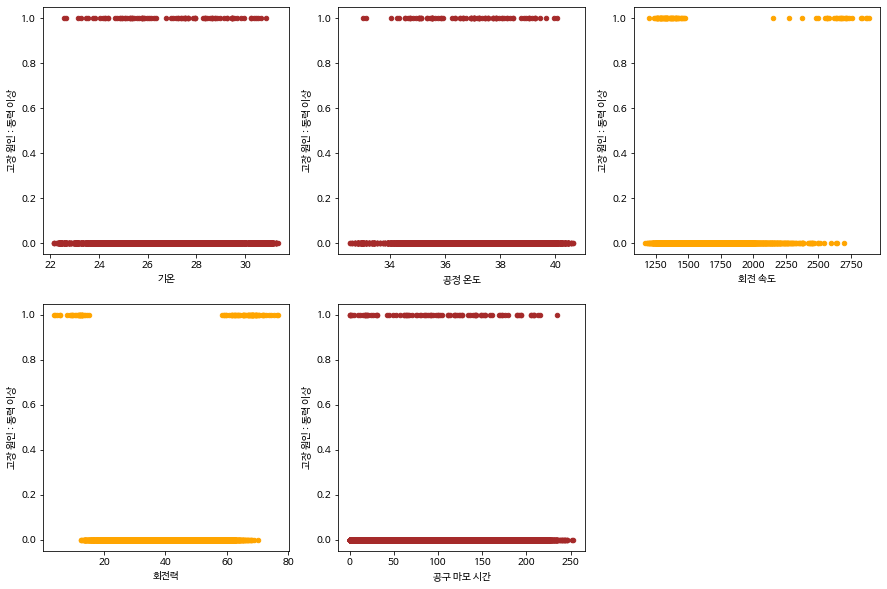

In [31]:
fig = plt.figure(figsize=(15,10))

ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)

df.plot(x='기온', y='고장 원인 : 동력 이상', kind='scatter', ax=ax1, c='brown')
df.plot(x='공정 온도', y='고장 원인 : 동력 이상', kind='scatter', ax=ax2, c='brown')
df.plot(x='회전 속도', y='고장 원인 : 동력 이상', kind='scatter', ax=ax3, c='orange')
df.plot(x='회전력', y='고장 원인 : 동력 이상', kind='scatter', ax=ax4, c='orange')
df.plot(x='공구 마모 시간', y='고장 원인 : 동력 이상', kind='scatter', ax=ax5, c='brown')

In [32]:
print(df[(df['고장 원인 : 동력 이상'] == 1)&(df['회전 속도'] < 1750)]['회전 속도'].max())
print(df[(df['고장 원인 : 동력 이상'] == 1)&(df['회전 속도'] > 1750)]['회전 속도'].min())
print(df[(df['고장 원인 : 동력 이상'] == 1)&(df['회전력'] < 40)]['회전력'].max())
print(df[(df['고장 원인 : 동력 이상'] == 1)&(df['회전력'] > 40)]['회전력'].min())

1479
2153
15.3
58.5


In [33]:
# 해석
# 고장 원인 : 과부하의 경우
# 회전속도와 가장 높은 상관계수를 가지며,
# 회전속도 1479 rpm 이하 또는 2153 rpm 이상, 회전력 15.3Nm 이하 또는 58.5Nm 이상의 조건에서 기계 고장이 일어나는 것으로 보인다.

In [34]:
# 3. 종합해 봤을 때, 고장을 막기 위해서는
# 3-1. 기온은 27.65도, 공정 온도는 36.25도를 넘기지 않는 환경에서,
# 3-2. 회전속도는 1515~2153rpm 수준으로, 회전력은 15.3~46.3Nm 수준으로 유지하고,
# 3-3. 공구 마모 시간은 172min을 넘기지 않도록 하는 것이 방안이 될 수 있겠다.

# 추가 분석

In [35]:
# 무작위 고장원인 분석을 위한 DATA 생성
df_HDF = df.loc[df['고장 원인 : 열 방산'] == 1].copy()
df_PWF = df.loc[df['고장 원인 : 동력 이상'] == 1].copy()
df_OSF = df.loc[df['고장 원인 : 과부하'] == 1].copy()
df_RNF = df.loc[df['고장 원인 : 무작위'] == 1].copy()

In [36]:
df_RNF

,제품 ID,제품 유형,기온,공정 온도,회전 속도,회전력,공구 마모 시간,고장 여부,고장 원인 : 공구 마모,고장 원인 : 열 방산,고장 원인 : 동력 이상,고장 원인 : 과부하,고장 원인 : 무작위,고장 요인 합계
UDI,,,,,,,,,,,,,,
1222,M16081,M,23.85,35.15,1399,46.4,132,0,0,0,0,0,1,1
1303,L48482,L,25.45,36.65,1505,45.7,144,0,0,0,0,0,1,1
1749,H31162,H,25.25,34.55,1626,31.1,166,0,0,0,0,0,1,1
2073,L49252,L,26.45,36.35,1570,35.5,189,0,0,0,0,0,1,1
2560,L49739,L,26.15,35.85,1447,50.4,140,0,0,0,0,0,1,1
3066,M17925,M,26.95,36.05,1687,27.7,95,0,0,0,0,0,1,1
3453,H32866,H,28.45,37.35,1602,32.3,2,0,0,0,0,0,1,1
3612,L50791,L,28.55,37.75,1405,46.4,207,1,1,0,0,0,1,2
5472,L52651,L,29.55,39.15,1346,61.2,170,0,0,0,0,0,1,1


In [37]:
print(df['기온'].sum() / len(df['기온']))
print(df[df['고장 원인 : 열 방산'] == 1]['기온'].sum() / len(df[df['고장 원인 : 열 방산'] == 1]['기온']))
print(df[df['고장 원인 : 과부하'] == 1]['기온'].sum() / len(df[df['고장 원인 : 과부하'] == 1]['기온']))
print(df[df['고장 원인 : 동력 이상'] == 1]['기온'].sum() / len(df[df['고장 원인 : 동력 이상'] == 1]['기온']))

26.85493000000002
29.410869565217414
26.894897959183698
26.925789473684237


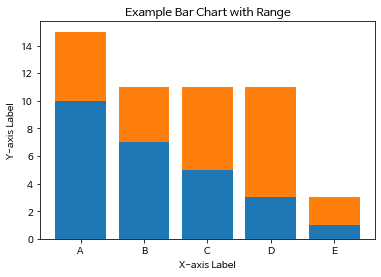

In [38]:
# 데이터 생성
x = ['A', 'B', 'C', 'D', 'E']
y1 = [10, 7, 5, 3, 1]
y2 = [5, 4, 6, 8, 2]

# 막대그래프 그리기
plt.bar(x, y1)
plt.bar(x, y2, bottom=y1)

# 그래프 제목과 축 레이블 설정
plt.title('Example Bar Chart with Range')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')

# 그래프 보여주기
plt.show()

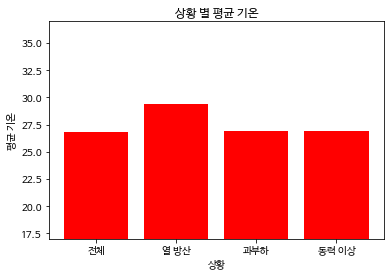

In [39]:
# 데이터 생성
x = ['전체', '열 방산', '과부하', '동력 이상']
y = [df['기온'].sum() / len(df['기온']),
     df[df['고장 원인 : 열 방산'] == 1]['기온'].sum() / len(df[df['고장 원인 : 열 방산'] == 1]['기온']),
     df[df['고장 원인 : 과부하'] == 1]['기온'].sum() / len(df[df['고장 원인 : 과부하'] == 1]['기온']),
     df[df['고장 원인 : 동력 이상'] == 1]['기온'].sum() / len(df[df['고장 원인 : 동력 이상'] == 1]['기온'])]

# 막대그래프 그리기
plt.bar(x, y, color='red')

# y축 범위 제한
plt.ylim(17, 37)

# 그래프 제목과 축 레이블 설정
plt.title('상황 별 평균 기온')
plt.xlabel('상황')
plt.ylabel('평균 기온')

# 그래프 보여주기
plt.show()

In [40]:
print(df['공정 온도'].sum() / len(df['공정 온도']))
print(df[df['고장 원인 : 열 방산'] == 1]['공정 온도'].sum() / len(df[df['고장 원인 : 열 방산'] == 1]['공정 온도']))
print(df[df['고장 원인 : 과부하'] == 1]['공정 온도'].sum() / len(df[df['고장 원인 : 과부하'] == 1]['공정 온도']))
print(df[df['고장 원인 : 동력 이상'] == 1]['공정 온도'].sum() / len(df[df['고장 원인 : 동력 이상'] == 1]['공정 온도']))

36.85556000000002
37.63869565217393
36.92346938775513
36.804736842105285


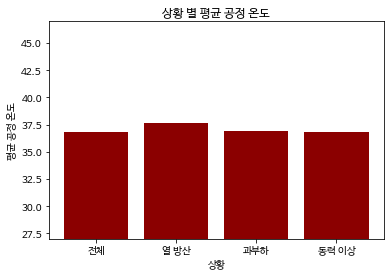

In [41]:
# 데이터 생성
x = ['전체', '열 방산', '과부하', '동력 이상']
y = [df['공정 온도'].sum() / len(df['공정 온도']),
     df[df['고장 원인 : 열 방산'] == 1]['공정 온도'].sum() / len(df[df['고장 원인 : 열 방산'] == 1]['공정 온도']),
     df[df['고장 원인 : 과부하'] == 1]['공정 온도'].sum() / len(df[df['고장 원인 : 과부하'] == 1]['공정 온도']),
     df[df['고장 원인 : 동력 이상'] == 1]['공정 온도'].sum() / len(df[df['고장 원인 : 동력 이상'] == 1]['공정 온도'])]

# 막대그래프 그리기
plt.bar(x, y, color='darkred')

# y축 범위 제한
plt.ylim(27, 47)

# 그래프 제목과 축 레이블 설정
plt.title('상황 별 평균 공정 온도')
plt.xlabel('상황')
plt.ylabel('평균 공정 온도')

# 그래프 보여주기
plt.show()

In [42]:
print(df['회전 속도'].sum() / len(df['회전 속도']))
print(df[df['고장 원인 : 열 방산'] == 1]['회전 속도'].sum() / len(df[df['고장 원인 : 열 방산'] == 1]['회전 속도']))
print(df[df['고장 원인 : 과부하'] == 1]['회전 속도'].sum() / len(df[df['고장 원인 : 과부하'] == 1]['회전 속도']))
print(df[df['고장 원인 : 동력 이상'] == 1]['회전 속도'].sum() / len(df[df['고장 원인 : 동력 이상'] == 1]['회전 속도']))

1538.7761
1337.2608695652175
1350.3265306122448
1763.9684210526316


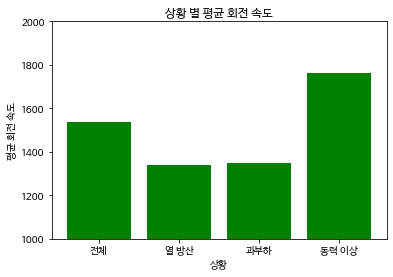

In [43]:
# 데이터 생성
x = ['전체', '열 방산', '과부하', '동력 이상']
y = [df['회전 속도'].sum() / len(df['회전 속도']),
     df[df['고장 원인 : 열 방산'] == 1]['회전 속도'].sum() / len(df[df['고장 원인 : 열 방산'] == 1]['회전 속도']),
     df[df['고장 원인 : 과부하'] == 1]['회전 속도'].sum() / len(df[df['고장 원인 : 과부하'] == 1]['회전 속도']),
     df[df['고장 원인 : 동력 이상'] == 1]['회전 속도'].sum() / len(df[df['고장 원인 : 동력 이상'] == 1]['회전 속도'])]

# 막대그래프 그리기
plt.bar(x, y, color='green')

# y축 범위 제한
plt.ylim(1000, 2000)

# 그래프 제목과 축 레이블 설정
plt.title('상황 별 평균 회전 속도')
plt.xlabel('상황')
plt.ylabel('평균 회전 속도')

# 그래프 보여주기
plt.show()

In [44]:
print(df['회전력'].sum() / len(df['회전력']))
print(df[df['고장 원인 : 열 방산'] == 1]['회전력'].sum() / len(df[df['고장 원인 : 열 방산'] == 1]['회전력']))
print(df[df['고장 원인 : 과부하'] == 1]['회전력'].sum() / len(df[df['고장 원인 : 과부하'] == 1]['회전력']))
print(df[df['고장 원인 : 동력 이상'] == 1]['회전력'].sum() / len(df[df['고장 원인 : 동력 이상'] == 1]['회전력']))

39.986909999999995
53.16695652173913
58.37040816326531
48.51473684210526


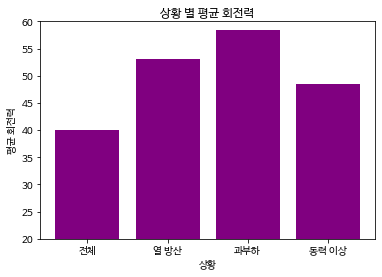

In [45]:
# 데이터 생성
x = ['전체', '열 방산', '과부하', '동력 이상']
y = [df['회전력'].sum() / len(df['회전력']),
     df[df['고장 원인 : 열 방산'] == 1]['회전력'].sum() / len(df[df['고장 원인 : 열 방산'] == 1]['회전력']),
     df[df['고장 원인 : 과부하'] == 1]['회전력'].sum() / len(df[df['고장 원인 : 과부하'] == 1]['회전력']),
     df[df['고장 원인 : 동력 이상'] == 1]['회전력'].sum() / len(df[df['고장 원인 : 동력 이상'] == 1]['회전력'])]

# 막대그래프 그리기
plt.bar(x, y, color='purple')

# y축 범위 제한
plt.ylim(20, 60)

# 그래프 제목과 축 레이블 설정
plt.title('상황 별 평균 회전력')
plt.xlabel('상황')
plt.ylabel('평균 회전력')

# 그래프 보여주기
plt.show()

In [46]:
print(df['공구 마모 시간'].sum() / len(df['공구 마모 시간']))
print(df[df['고장 원인 : 열 방산'] == 1]['공구 마모 시간'].sum() / len(df[df['고장 원인 : 열 방산'] == 1]['공구 마모 시간']))
print(df[df['고장 원인 : 과부하'] == 1]['공구 마모 시간'].sum() / len(df[df['고장 원인 : 과부하'] == 1]['공구 마모 시간']))
print(df[df['고장 원인 : 동력 이상'] == 1]['공구 마모 시간'].sum() / len(df[df['고장 원인 : 동력 이상'] == 1]['공구 마모 시간']))

107.951
107.19130434782609
207.69387755102042
101.88421052631578


In [47]:
# 해석
# 기온은 '열 방산'이 있을 때 평균값이 더 높았다.
# 공정온도의 평균값은 별다른 차이를 보이지 않았다.
# 회전 속도의 평균값은 '열 방산', '과부하' 때에는 낮은 수치를, '동력 이상' 대에는 높은 수치를 보였다.
# 회전력의 평균값은 모든 고장 원인에서 높은 수치를 보였다.
# 공구 마모 시간의 평균값은 '과부하'가 일어날 때 높은 수치를 보였다.

In [48]:
# '공구 마모 시간' 패턴 확인
df[df['공구 마모 시간'] >= 200].head(50)

,제품 ID,제품 유형,기온,공정 온도,회전 속도,회전력,공구 마모 시간,고장 여부,고장 원인 : 공구 마모,고장 원인 : 열 방산,고장 원인 : 동력 이상,고장 원인 : 과부하,고장 원인 : 무작위,고장 요인 합계
UDI,,,,,,,,,,,,,,
74,L47253,L,25.85,35.95,1592,35.0,200,0,0,0,0,0,0,0
75,L47254,L,25.75,35.85,1601,32.3,202,0,0,0,0,0,0,0
76,L47255,L,25.65,35.75,1379,46.7,204,0,0,0,0,0,0,0
77,L47256,L,25.65,35.75,1461,47.9,206,0,0,0,0,0,0,0
78,L47257,L,25.65,35.75,1455,41.3,208,1,1,0,0,0,0,1
157,M15016,M,25.25,34.95,1495,46.0,203,0,0,0,0,0,0,0
158,H29571,H,25.25,35.05,1478,43.5,206,0,0,0,0,0,0,0
159,M15018,M,25.25,35.05,1499,40.0,211,0,0,0,0,0,0,0
160,L47339,L,25.25,35.05,1471,47.0,214,0,0,0,0,0,0,0


In [49]:
# 0에서 200 언저리까지 증가하다가 기계 고장이 일어난 후 교체되는 형태를 보인다.

In [50]:
# 공구 마모 고장 평균 시간
df[df['고장 원인 : 공구 마모'] == 1]['공구 마모 시간'].sum() / len(df[df['고장 원인 : 공구 마모'] == 1]['공구 마모 시간'])

216.3695652173913

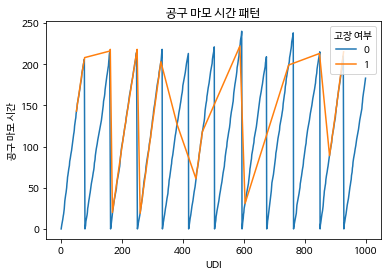

In [51]:
# 데이터 생성
x = df[df.index < 1000].index
y = df[df.index < 1000]['공구 마모 시간']
hue_data = df[df.index < 1000]['고장 여부']

# 꺽은선 그래프 그리기
sns.lineplot(x=x, y=y, hue=hue_data)

# 그래프 제목과 축 레이블 설정
plt.title('공구 마모 시간 패턴')
plt.xlabel('UDI')
plt.ylabel('공구 마모 시간')

# 그래프 보여주기
plt.show()

In [52]:
# 공구 교체 시기 제외 코드
from numpy import NaN
df_replace = []
for i in range(len(df) - 1):
    if df['공구 마모 시간'][i+1] > df['공구 마모 시간'][i+2]:
        df_replace.append(df['공구 마모 시간'][i+1])
        df['공구 마모 시간'][i+1] = NaN
df.dropna(inplace=True)

<ipython-input-52-509d37d2f3a7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['공구 마모 시간'][i+1] = NaN
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [53]:
# 공구 교체 횟수
len(df_replace)

119

In [54]:
# 공구 교체 주기 평균
sum(df_replace) / len(df_replace)

215.65546218487395

In [55]:
df.sum()

제품 ID            M14860L47181L47182L47183L47184M14865L47186L471...
제품 유형            MLLLLMLLMMHHMMLLMMHMHLMLMLLHLLMLLLMMMLHLLLMHML...
기온                                                       265357.05
공정 온도                                                    364174.35
회전 속도                                                     15204088
회전력                                                       395132.4
공구 마모 시간                                                 1053847.0
고장 여부                                                          284
고장 원인 : 공구 마모                                                    0
고장 원인 : 열 방산                                                   114
고장 원인 : 동력 이상                                                   94
고장 원인 : 과부하                                                     87
고장 원인 : 무작위                                                     17
고장 요인 합계                                                       312
dtype: object

In [56]:
# 공구 교체 시기(119회)를 제외하니 고장 원인 : 공구 마모(46회)가 0회로 줄어들었다.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


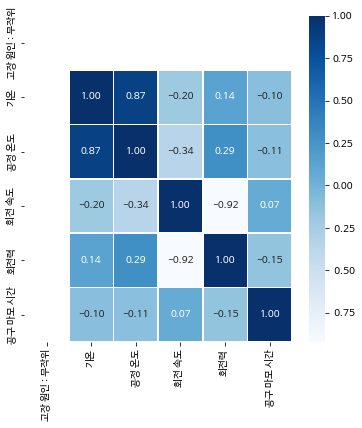

In [57]:
# 고장 원인 : 무작위 상관 관계 heatmap (미확인 고장 여부 미 합산) 
data_RNF = df_RNF[['고장 원인 : 무작위','기온' , '공정 온도', '회전 속도','회전력', '공구 마모 시간']]
plt.figure(figsize=(6,6))
sns.heatmap(data = data_RNF.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [58]:
# 고장 원인 : 무작위의 경우 변수들 즉, 기온, 공정온도와, 회전속도, 회전력, 공구마모시간과 과의 상관관계 가 
# -0.26 ~ 0.87 범위로 0에 근접하여 있어 거의 관계가 없음을 알 수 있다

In [59]:
# 고장 원인 : 무작위의 경우 애초에 기계 고장 데이터에 포함되지도 않았다.

In [60]:
# Machine failure 중 failure 유형이 없는 데이터 9개 확인 및 생성 
df_failure_add = df[(df['고장 여부']==1) & (df['고장 원인 : 공구 마모']==0) & (df['고장 원인 : 열 방산']==0) & (df['고장 원인 : 동력 이상']==0) & (df['고장 원인 : 과부하']==0) & (df['고장 원인 : 무작위']==0)].copy()
df_failure_add

,제품 ID,제품 유형,기온,공정 온도,회전 속도,회전력,공구 마모 시간,고장 여부,고장 원인 : 공구 마모,고장 원인 : 열 방산,고장 원인 : 동력 이상,고장 원인 : 과부하,고장 원인 : 무작위,고장 요인 합계
UDI,,,,,,,,,,,,,,
1438,H30851,H,25.65,36.75,1439,45.2,40.0,1,0,0,0,0,0,0
2750,M17609,M,26.55,36.05,1685,28.9,179.0,1,0,0,0,0,0,0
4045,M18904,M,28.75,37.75,1419,47.7,20.0,1,0,0,0,0,0,0
4685,M19544,M,30.45,38.65,1421,44.8,101.0,1,0,0,0,0,0,0
5537,M20396,M,29.15,38.65,1363,54.0,119.0,1,0,0,0,0,0,0
5942,L53121,L,27.45,37.55,1438,48.5,78.0,1,0,0,0,0,0,0
6479,L53658,L,27.35,36.65,1663,29.1,145.0,1,0,0,0,0,0,0
8507,L55686,L,25.25,36.45,1710,27.3,163.0,1,0,0,0,0,0,0
9016,L56195,L,24.05,34.95,1431,49.7,210.0,1,0,0,0,0,0,0


In [61]:
# df_failure_add 데이터 값 수정 (Machine failure : 1 -> 0 / RNF : 0 -> 1) 
df_failure_add['고장 여부'].replace(1,0, inplace = True)
df_failure_add['고장 원인 : 무작위'].replace(0,1, inplace = True)
df_failure_add

,제품 ID,제품 유형,기온,공정 온도,회전 속도,회전력,공구 마모 시간,고장 여부,고장 원인 : 공구 마모,고장 원인 : 열 방산,고장 원인 : 동력 이상,고장 원인 : 과부하,고장 원인 : 무작위,고장 요인 합계
UDI,,,,,,,,,,,,,,
1438,H30851,H,25.65,36.75,1439,45.2,40.0,0,0,0,0,0,1,0
2750,M17609,M,26.55,36.05,1685,28.9,179.0,0,0,0,0,0,1,0
4045,M18904,M,28.75,37.75,1419,47.7,20.0,0,0,0,0,0,1,0
4685,M19544,M,30.45,38.65,1421,44.8,101.0,0,0,0,0,0,1,0
5537,M20396,M,29.15,38.65,1363,54.0,119.0,0,0,0,0,0,1,0
5942,L53121,L,27.45,37.55,1438,48.5,78.0,0,0,0,0,0,1,0
6479,L53658,L,27.35,36.65,1663,29.1,145.0,0,0,0,0,0,1,0
8507,L55686,L,25.25,36.45,1710,27.3,163.0,0,0,0,0,0,1,0
9016,L56195,L,24.05,34.95,1431,49.7,210.0,0,0,0,0,0,1,0


In [62]:
# df_RNF 데이터 값 수정 (Machine failure : 1 -> 0 / TWF : 1 -> 0) 
df_RNF['고장 여부'].replace(1,0, inplace = True)
df_RNF['고장 원인 : 공구 마모'].replace(1,0, inplace = True)
df_RNF

,제품 ID,제품 유형,기온,공정 온도,회전 속도,회전력,공구 마모 시간,고장 여부,고장 원인 : 공구 마모,고장 원인 : 열 방산,고장 원인 : 동력 이상,고장 원인 : 과부하,고장 원인 : 무작위,고장 요인 합계
UDI,,,,,,,,,,,,,,
1222,M16081,M,23.85,35.15,1399,46.4,132,0,0,0,0,0,1,1
1303,L48482,L,25.45,36.65,1505,45.7,144,0,0,0,0,0,1,1
1749,H31162,H,25.25,34.55,1626,31.1,166,0,0,0,0,0,1,1
2073,L49252,L,26.45,36.35,1570,35.5,189,0,0,0,0,0,1,1
2560,L49739,L,26.15,35.85,1447,50.4,140,0,0,0,0,0,1,1
3066,M17925,M,26.95,36.05,1687,27.7,95,0,0,0,0,0,1,1
3453,H32866,H,28.45,37.35,1602,32.3,2,0,0,0,0,0,1,1
3612,L50791,L,28.55,37.75,1405,46.4,207,0,0,0,0,0,1,2
5472,L52651,L,29.55,39.15,1346,61.2,170,0,0,0,0,0,1,1


In [63]:
# RNF 데이터에 더해 합치기 (28개 = 9 +19), 고장 발생 전체와의 상관관계 분석을 위한 열방산, 동력 이상, 과부하 데이터도 함께합침  
df_RNF_add = pd.concat([df_RNF, df_failure_add,df_HDF,df_PWF,df_OSF])
df_RNF_add

,제품 ID,제품 유형,기온,공정 온도,회전 속도,회전력,공구 마모 시간,고장 여부,고장 원인 : 공구 마모,고장 원인 : 열 방산,고장 원인 : 동력 이상,고장 원인 : 과부하,고장 원인 : 무작위,고장 요인 합계
UDI,,,,,,,,,,,,,,
1222,M16081,M,23.85,35.15,1399,46.4,132.0,0,0,0,0,0,1,1
1303,L48482,L,25.45,36.65,1505,45.7,144.0,0,0,0,0,0,1,1
1749,H31162,H,25.25,34.55,1626,31.1,166.0,0,0,0,0,0,1,1
2073,L49252,L,26.45,36.35,1570,35.5,189.0,0,0,0,0,0,1,1
2560,L49739,L,26.15,35.85,1447,50.4,140.0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9665,L56844,L,25.95,37.05,1317,54.8,231.0,1,0,0,0,1,0,1
9668,L56847,L,26.05,37.15,1352,48.9,238.0,1,0,0,0,1,0,1
9823,L57002,L,25.35,36.25,1360,60.9,187.0,1,0,0,0,1,0,1


In [64]:
df_RNF_add.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336 entries, 1222 to 9975
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   제품 ID          336 non-null    object 
 1   제품 유형          336 non-null    object 
 2   기온             336 non-null    float64
 3   공정 온도          336 non-null    float64
 4   회전 속도          336 non-null    int64  
 5   회전력            336 non-null    float64
 6   공구 마모 시간       336 non-null    float64
 7   고장 여부          336 non-null    int64  
 8   고장 원인 : 공구 마모  336 non-null    int64  
 9   고장 원인 : 열 방산   336 non-null    int64  
 10  고장 원인 : 동력 이상  336 non-null    int64  
 11  고장 원인 : 과부하    336 non-null    int64  
 12  고장 원인 : 무작위    336 non-null    int64  
 13  고장 요인 합계       336 non-null    int64  
dtypes: float64(4), int64(8), object(2)
memory usage: 39.4+ KB


In [65]:
# 전체 평균값 산출
df_RNF_add.mean()

<ipython-input-65-37d5907d1b29>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_RNF_add.mean()


기온                 27.816071
공정 온도              37.177083
회전 속도            1474.636905
회전력                52.525000
공구 마모 시간          136.250000
고장 여부               0.916667
고장 원인 : 공구 마모       0.011905
고장 원인 : 열 방산        0.369048
고장 원인 : 동력 이상       0.327381
고장 원인 : 과부하         0.345238
고장 원인 : 무작위         0.083333
고장 요인 합계            1.113095
dtype: float64

In [66]:
# Type 별 Tool ware 의 평균 값
RNF_tabl1 = pd.pivot_table(df_RNF_add, index='고장 원인 : 무작위', columns='제품 유형', values= '공구 마모 시간',aggfunc='mean',margins=True)
RNF_tabl1

제품 유형,H,L,M,All
고장 원인 : 무작위,,,,
0,124.333333,144.292793,119.183099,137.532468
1,52.200000,147.823529,107.666667,122.142857
All,106.300000,144.543933,118.285714,136.250000


In [67]:
# RNF와 5가지 변수들의 상관 관계 분석  ->
df_RNF_add[['고장 원인 : 무작위','기온' , '공정 온도', '회전 속도','회전력', '공구 마모 시간']].corr( ) 

,고장 원인 : 무작위,기온,공정 온도,회전 속도,회전력,공구 마모 시간
고장 원인 : 무작위,1.000000,-0.044870,0.057190,0.013971,-0.179222,-0.059621
기온,-0.044870,1.000000,0.849589,-0.137525,-0.010577,-0.200449
공정 온도,0.057190,0.849589,1.000000,-0.083104,-0.009025,-0.103100
회전 속도,0.013971,-0.137525,-0.083104,1.000000,-0.887700,-0.164072
회전력,-0.179222,-0.010577,-0.009025,-0.887700,1.000000,0.140192
공구 마모 시간,-0.059621,-0.200449,-0.103100,-0.164072,0.140192,1.000000


In [68]:
data_RNF = df_RNF_add[['고장 원인 : 무작위','기온' , '공정 온도', '회전 속도','회전력', '공구 마모 시간']]

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


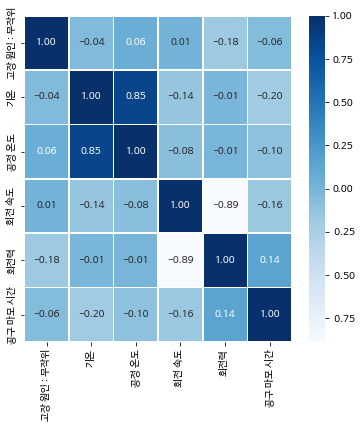

In [69]:
# RNF 상관 관계 heatmap 
plt.figure(figsize=(6,6))
sns.heatmap(data = data_RNF.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')